In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
target = pd.read_csv('Data/2_category.csv')
dep = pd.read_csv('Data/filled_data3.csv')

In [7]:
target.isna().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [16]:
df = pd.concat((dep.drop('Interest_Rate',axis = 1),target['Interest_Rate']),axis = 1)

In [17]:
df.isna().sum()

Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\tejas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\tejas\Anaconda3\

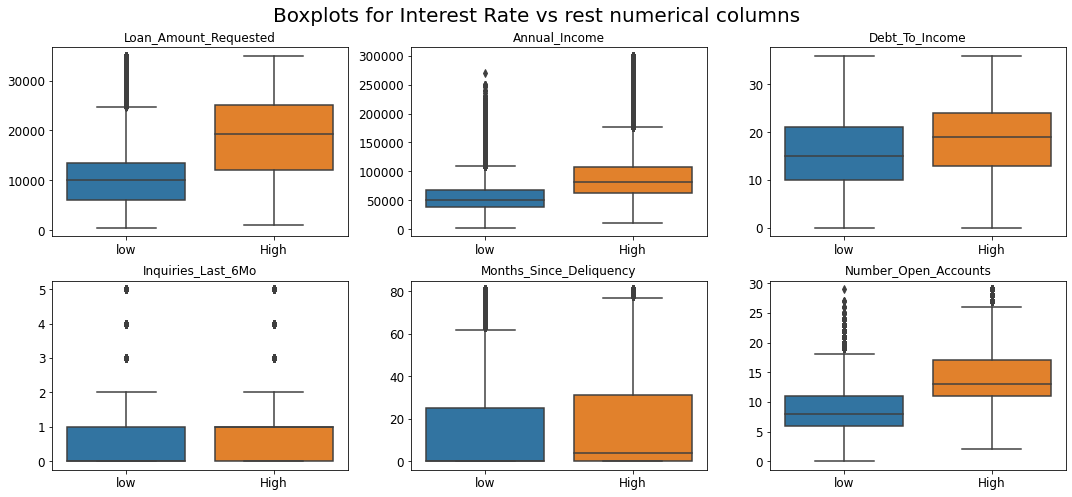

In [23]:
fig,ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15,7))
data1 = df
for variables,plotsubs in zip(data1.select_dtypes(np.number),ax.flatten()):
    plotsubs.tick_params(labelsize = 12)
    plotsubs.set_title(variables,fontsize = 12)
    sns.boxplot(data1['Interest_Rate'],data1[variables],ax = plotsubs)
    plotsubs.set_xlabel('')
    plotsubs.set_ylabel('')
    plt.tight_layout()
    plt.subplots_adjust(top = 0.90)
    
fig.suptitle('Boxplots for Interest Rate vs rest numerical columns',fontsize = 20)
plt.show()

### Model Building

In [26]:
df['Interest_Rate'] = df['Interest_Rate'].map({'low':0,'High':1})

In [28]:
data = pd.get_dummies(df,drop_first = True)

In [30]:
X = data.drop('Interest_Rate',axis = 1)
y = data['Interest_Rate']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

### Logistic Regression

In [42]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train,X_train).fit()
np.exp(log_reg.params)

Optimization terminated successfully.
         Current function value: 0.271900
         Iterations 8


Loan_Amount_Requested                   1.000133
Annual_Income                           1.000011
Debt_To_Income                          0.989117
Inquiries_Last_6Mo                      1.116446
Months_Since_Deliquency                 0.998908
Number_Open_Accounts                    1.265679
Total_Accounts                          1.124440
Length_Employed_10+ yrs                 0.128041
Length_Employed_2-5 yrs                 0.047210
Length_Employed_6-10 yrs                0.066642
Home_Owner_None                         0.654354
Home_Owner_Other                        0.267981
Home_Owner_Own                          0.116371
Home_Owner_Rent                         0.084256
Income_Verified_not verified            0.087016
Purpose_Of_Loan_Depreciating_Expense    0.029555
Purpose_Of_Loan_Other                   0.010069
Purpose_Of_Loan_Personal_Expense        0.008584
Gender_Male                             0.427970
dtype: float64

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6639553280595626

### Base Model

In [46]:
def model_function(model,X_train,X_test,y_train,y_test):
    #Fitting the model
    model = model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('*'*95)
    print("\n"+"\033[1m"+'Model Report for '+str(model)+"\033[0;0m"+"\n")
    print('*'*95)

    #Performance metrics
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))

    #Confusion_Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (15,6))
    sns.heatmap(cm,annot = True,fmt = '.2f')
    plt.title('Confusion Matrix')
    plt.xticks([0.5,1.5],[1,2])
    plt.yticks([0.5,1.5],[1,2])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def grid_search(estimator,params,X_train,y_train,cv=5,v=0):
    from sklearn.model_selection import GridSearchCV
    grid = GridSearchCV(estimator,params,scoring = 'roc_auc',n_jobs = -1,cv = cv,verbose = v)
    grid.fit(X_train,y_train)
    return grid.best_params_

### Decision Tree Classifier

***********************************************************************************************

Model Report for DecisionTreeClassifier()

***********************************************************************************************
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     29432
           1       0.92      0.92      0.92     24293

    accuracy                           0.93     53725
   macro avg       0.93      0.93      0.93     53725
weighted avg       0.93      0.93      0.93     53725



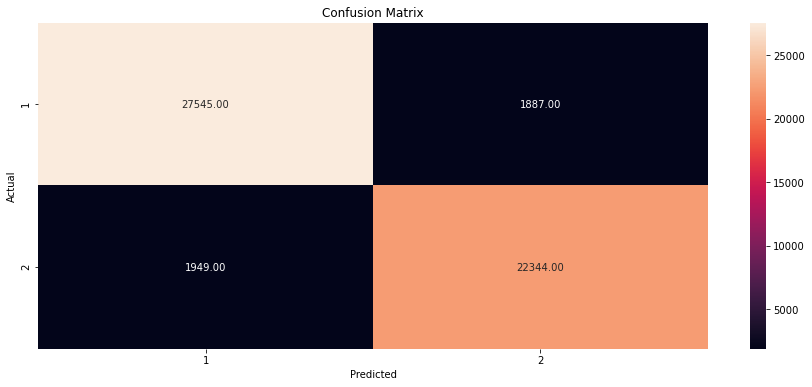

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_function(dtc,X_train,X_test,y_train,y_test)

### Extra Trees Classifier

***********************************************************************************************

Model Report for ExtraTreesClassifier()

***********************************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     29432
           1       0.96      0.95      0.96     24293

    accuracy                           0.96     53725
   macro avg       0.96      0.96      0.96     53725
weighted avg       0.96      0.96      0.96     53725



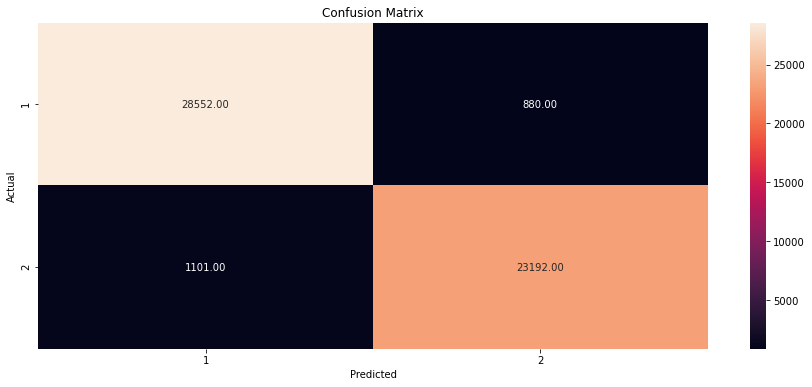

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
model_function(etc,X_train,X_test,y_train,y_test)

### Random Forest Classifier

***********************************************************************************************

Model Report for RandomForestClassifier()

***********************************************************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     29432
           1       0.96      0.95      0.96     24293

    accuracy                           0.96     53725
   macro avg       0.96      0.96      0.96     53725
weighted avg       0.96      0.96      0.96     53725



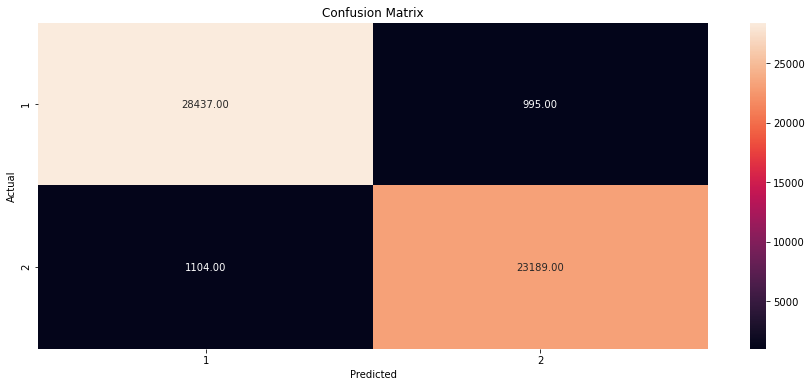

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_function(rfc,X_train,X_test,y_train,y_test)

In [54]:
original_target = pd.read_csv('Data/capstone_train.csv')['Interest_Rate']

In [57]:
original_target = original_target.rename('Original_Interest_Rate')